## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 5: Differential Equations

## Due: November 12, 2023 by 11:59 PM
### <span style="color: red">David Petkov</span>

Copyright &copy; 2023, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.

In [1]:
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from scipy.integrate import odeint

### 1. Taylor Approxmations

Use `sympy` to find the Taylor Approximations to $\sin x$ with:
- one term,
- two terms,
- three terms, all the way up to 6 terms.
Ignore the remainder term. Plot all of these approximations along with $\sin x$ on the same plot, showing the
approximations get better and better.

## Answer to Problem 1

$\sin 0 = 0$ \\
$\cos 0 = 1$ \\

Assume $x_0=0$. Taylor series for $\sin x$:

$$
f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + ...
     + \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n
     + ... \rightarrow
$$
One term:
$$
f(x) = \sin(x_0) =0
$$

Two terms:
$$
f(x) = \sin(x_0) + \cos(x_0)(x) = \cos(x_0)(x) = x
$$
Three terms:
$$
f(x) = \sin(x_0) + \cos(x_0)(x) - \frac{\sin(x_0)}{2!}(x)^2 = \cos(x_0)(x) =x
$$

Six terms(includes the fourth and fifth terms as well):
$$
f(x) = \sin(x_0) + \cos(x_0)(x) - \frac{\sin(x_0)}{2!}(x)^2
     - \frac{\cos(x_0)}{3!}(x)^3 + \frac{\sin(x_0)}{4!}(x)^4
     + \frac{\cos(x_0)}{5!}(x)^5 = \\
     \cos(x_0)(x) - \frac{\cos(x_0)}{3!}(x)^3  + \frac{\cos(x_0)}{5!}(x)^5
     =x- \frac{x^3}{3!}+\frac{x^5}{5!}
$$

In [2]:
from sympy import series, sin
from sympy.abc import x,h
Taylor = series(sin(x), x, x0=0, n=6)
Taylor

     3     5        
    x     x     ⎛ 6⎞
x - ── + ─── + O⎝x ⎠
    6    120        

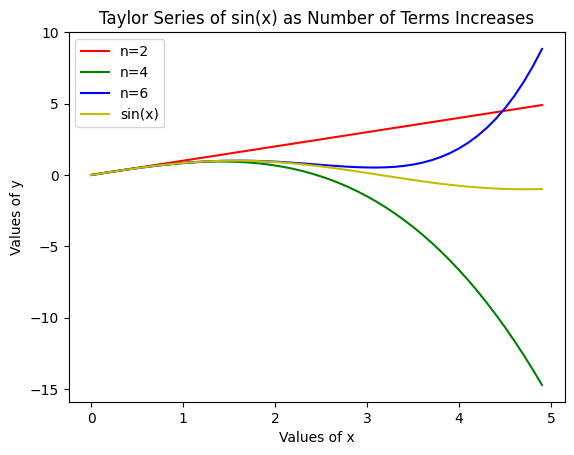

In [3]:
import math
x = np.arange(0, 5, .1) # Define the domain, need a small domain since all functions rise very quickly.

# Define functions
two = x
four= (x)-(x**3/math.factorial(3))
six= (x)-(x**3/math.factorial(3))+(x**5/math.factorial(5))
sin = np.sin(x)

# Plot characteristics
plt.title("Taylor Series of sin(x) as Number of Terms Increases") # Add title
plt.xlabel("Values of x") # Add axis labels
plt.ylabel("Values of y")
plt.plot(x, two, "-r", label="n=2") # Plot n=2 in red
plt.plot(x, four, "-g", label="n=4") # Plot n=4 in green
plt.plot(x, six, "-b", label="n=6") # Plot n=6 in blue
plt.plot(x, sin, "-y", label="sin(x)") # Plot n=6 in yellow
plt.legend(loc="best") # Put the legend in the 'best' spot
plt.show()

### 2. Showing Inequalities With Taylor's Approximation.

Show that if $x>0$ then $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 + \frac{1}{2}x$.

Hint: break this into two steps, one for each inequality. For the first step, use the first three terms of the Taylor approximation and a residual term that is cubic. For the second inequality, use the first two terms of the Taylor approximation and a residual term that is a square. Make sure to explain each step of your argument.

How good is this approximation for $\sqrt{2}$? How about $\sqrt{3}$?

Visualize this problem by making a plot showing the relationship of the three expressions as $x$ increases.

## Answer to Problem 2

$x=1$, $\sqrt{1+x}=1.4142135$ \\
$x=2$, $\sqrt{1+x}=1.7320508$ \\

The first step is to find the taylor series of each function (verify with Python). Then, we compute the values at $x=1,2$ for both inequalities and mathematically prove the first inequality is less than the second. There will also be graphical proof of this.

\\
Assume $ x_0= 0$ for all. \\
Taylor Series for $1 + \frac{1}{2}x - \frac{1}{8}x^2$: \\


$$
f(x_0)=1 \\
f'(x_0)(x-x_0) = \frac{1}{2}x \\
\frac{f''(x_0)}{2!}(x-x_0)^2=-\frac{1}{8}x^2 \\
=1+\frac{1}{2}x-\frac{1}{8}x^2 \\
x=1 \rightarrow f(1)=1.375 \\
1.375- \sqrt{2} = -0.03921 \\
x=2 \rightarrow f(2)=1.5 \\
1.5-\sqrt{3} = -0.23205
$$

Taylor Series for $1 + \frac{1}{2}x$: \\


$$
f(x_0)=1 \\
f'(x_0)(x-x_0) = \frac{1}{2}x \\
=1+\frac{1}{2}x \\
x=1 \rightarrow f(1)=1.5 \\
\sqrt{2}-1.5 = 0.08578 \\
x=2 \rightarrow f(2)=2 \\
\sqrt{3}-2 = 0.26794
$$

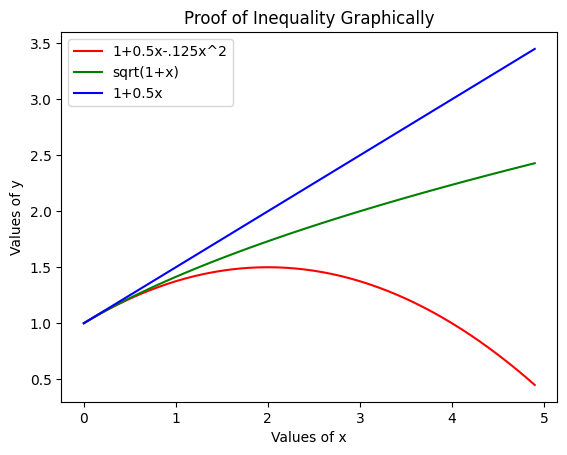

In [56]:
import math
x = np.arange(0, 5, .1) # Define the domain, need a small domain since both functions rise very quickly.
first = 1+.5*x-.125*(x**2)
second= (1+x)**.5
third= 1+.5*x

plt.title("Proof of Inequality Graphically") # Add title
plt.xlabel("Values of x") # Add axis labels
plt.ylabel("Values of y")
plt.plot(x, first, "-r", label="1+0.5x-.125x^2") # Plot n=2 in red
plt.plot(x, second, "-g", label="sqrt(1+x)") # Plot n=4 in green
plt.plot(x, third, "-b", label="1+0.5x") # Plot n=6 in blue
plt.legend(loc="best") # Put the legend in the 'best' spot
plt.show()

In [5]:
from sympy import series, sin
from sympy.abc import x
first = series(1+0.5*x-.125*(x**2), x, x0=0, n=3)
first

         2            
- 0.125⋅x  + 0.5⋅x + 1

In [6]:
second = series((x+1)**.5, x, x0=0, n=5)
second

                   2           3              4    ⎛ 5⎞
1 + 0.5⋅x - 0.125⋅x  + 0.0625⋅x  - 0.0390625⋅x  + O⎝x ⎠

In [7]:
third = series(1+0.5*x, x, x0=0, n=3)
third

0.5⋅x + 1

### 3. Equilibria Points and Linearization

For each of the
following systems:

(i) find the equilibria,

(ii) linearize the system around each equilibrium and find the eigenvalues, and

(iii) state whether the system is stable at each equilibrium.

$$
\mathrm{a)} \;\;
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} =
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{b)} \;\;
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} =
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\;
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} =
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

## Answers to Problem 3

For all problems, the Jacobian is found by:

\begin{align}
J & = \begin{pmatrix}
\frac{\partial \dot x_1}{\partial x_1} &
\frac{\partial \dot x_1}{\partial x_2} \\
\frac{\partial \dot x_2}{\partial x_1} &
\frac{\partial \dot x_2}{\partial x_2} \\
\end{pmatrix} \\
\end{align}

And eigenvalues by: $det|J- \lambda I|$

# a)

$\dot x_1=x_2^2 $ \\
$\dot x_2=x_1^2 $

(i) Equilibria: $x_1=x_2=0 =(0,0)$ from:
$$
\dot x_1=0=x_2^2 \\
\dot x_2=0=x_1^2
$$
(ii) Jacobian at (0,0) is:


\begin{align}
J & = \begin{pmatrix}
0 & 2 x_2 \\
2x_1 & 0 \\
\end{pmatrix} \\
\; & = \begin{pmatrix}
0 & 0 \\
0 & 0
\end{pmatrix}
\end{align}

Eigenvalues: $\lambda_1 = \lambda_2 = 0, (0,0)$ from:
\begin{pmatrix}
0-\lambda & 0 \\
0 & 0-\lambda
\end{pmatrix}

(iii) Eigenvalue = 0, unstable

# b)

$\dot x_1=x_1^2+x_2^2 $ \\
$\dot x_2=x_2 $

(i) Equilibria: $x_1=x_2=0 =(0,0)$, if $\dot x_2=0=x_2$, then $x_1$ must $=0$

(ii) Jacobian at (0,0) is:


\begin{align}
J & = \begin{pmatrix}
2x_1 & 2 x_2 \\
0 & 1 \\
\end{pmatrix} \\
\; & = \begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix}
\end{align}

Eigenvalues: $\lambda_1 =0$, $ \lambda_2 = 1, (0,1)$ from:
\begin{pmatrix}
0-\lambda & 0 \\
0 & 1-\lambda
\end{pmatrix}

(iii) Eigenvalue = 0 and 1, unstable

# c)

$\dot x_1=\sin x_2 $ \\
$\dot x_2=\cos x_1 $

(i) Equilibria: $x_1=1,x_2=0, (1,0)$, from:
$$
\sin x_2 = 0, x_2 =0 \\
\cos x_1 =0, x_1 =1
$$

(ii) Jacobian at (0,0) is:


\begin{align}
J & = \begin{pmatrix}
0 & \cos x_2 \\
-\sin x_1 & 0 \\
\end{pmatrix} \\
\; & = \begin{pmatrix}
0 & 1 \\
-0.8414 & 0
\end{pmatrix}
\end{align}

Eigenvalues: $\lambda= 0\pm .917i$ from:
\begin{pmatrix}
0-\lambda & 1 \\
-0.8414 & 0-\lambda
\end{pmatrix}
$$
\lambda^2 + 0.8414 =0
$$

(iii) Eigenvalue $0$ real part, $\pm 0.917i$ imaginary part, unstable

<hr>

### 4. Tuning Eigenvalues

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k-1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2.
For what values of $k$ is the system stable?

Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$.

## Answers to Problem 4

The question mostly asks to plot certain behaviors in Python, I will answer the question for stability.

Using the trace and determinant method, the system is stable between $-2 \leq k < 0.5$ for the selected range. In order to be stable, the trace must be negative and the determinant positive.

The trace: $ 2k-1$ is negative at $k$ from $ -\infty$ to $0.5$, while the determinant $(k^2)$ is always positive.

In [38]:
# Code for Problem 4
# Find the eigenvalues of the system
k = sm.symbols("k") # Define k as variable
A = sm.Matrix([
    [k,-k],
    [1,k-1]
])

A.eigenvals() # Find eigenvalues

⎧      _________               _________       ⎫
⎪    ╲╱ 1 - 4⋅k    1         ╲╱ 1 - 4⋅k    1   ⎪
⎨k - ─────────── - ─: 1, k + ─────────── - ─: 1⎬
⎪         2        2              2        2   ⎪
⎩                                              ⎭

In [39]:
A.trace() # Find the trace

2⋅k - 1

In [47]:
A.det() # Find the determinant

 2
k 

<ipython-input-82-69a6951ba516>:4: RuntimeWarning: invalid value encountered in sqrt
  x=k-((1-4*k)**0.5)/2-0.5 # First eigenvalue
<ipython-input-82-69a6951ba516>:5: RuntimeWarning: invalid value encountered in sqrt
  y=k+((1-4*k)**0.5)/2-0.5 # Second eigenvalue


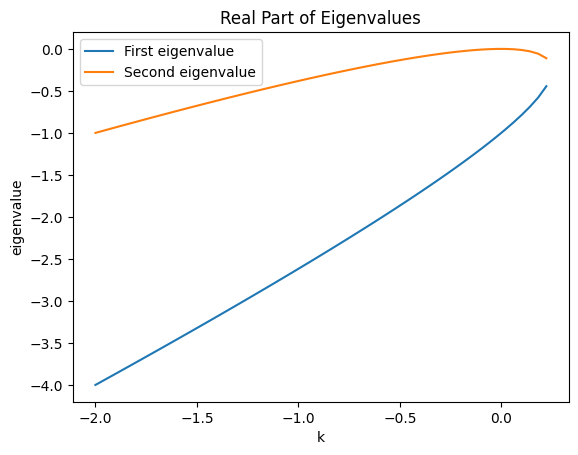

In [82]:
# Plot the system from -2<k<2
k = np.linspace(-2, 2,100)
x=k-((1-4*k)**0.5)/2-0.5 # First eigenvalue
y=k+((1-4*k)**0.5)/2-0.5 # Second eigenvalue

#Plot Characteristics
plt.plot(k,x, label="First eigenvalue")
plt.plot(k,y, label="Second eigenvalue")
plt.title('Real Part of Eigenvalues')
plt.xlabel('k')
plt.ylabel('eigenvalue')
plt.legend(loc="best") # Put the legend in the 'best' spot
plt.show()


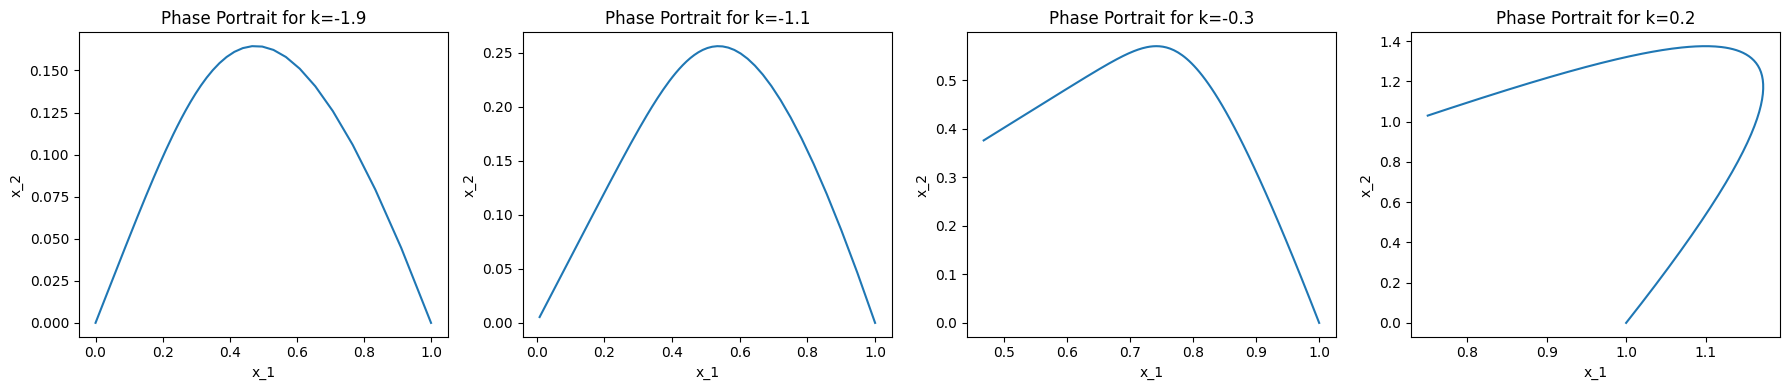

In [54]:
# Plot the range phase portraits

# Define the system
def system(x, t, k):
    A = np.array([[k, -k],
                  [1, k-1]])
    result = np.dot(A, x)
    return result

t = np.linspace(0, 10, 200) # Values for the time variable
k = [-1.9,-1.1,-.3, .2] # Random values of k
x = np.array([1, 0]) # Initial condition

# Plot characteristics
plt.figure(figsize=(18, 4))
for i, k in enumerate(k, 1):

    # Solve a system of ODEs
    X = odeint(system, x, t,args=(k,)) # Need optional parameter args to pass the values of k to the function

    plt.subplot(1, 4, i) # 1 row of 4 plots, indexed by i
    plt.plot(X[:,0], X[:,1]) # Plot on the x and y
    plt.title(f'Phase Portrait for k={k}')
    plt.xlabel('x_1')
    plt.ylabel('x_2')

plt.tight_layout()
plt.show()

### 5. Rotations Again

Let $\dot x = Ax$

$$
A = \begin{pmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{pmatrix}
$$

where $w_i \in \mathbb{R}$.

a) Show that $A$ is **skew symmetric**, meaning that, that $A^T = -A$.

b) Show that all points of the form

$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
$$

where $a$ is a scalar are equilibrum points.

c) Choose a few different choices for the $w_i$ and for each choice show example numerical trajectories by plotting the three components of the state $x$ versus time. Also plot the trajectories in the $x_1$ - $x_2$ plane.

## Answers to Problem 5

# a)

$$
A^T = \begin{pmatrix}
0 & w_3 & -w_2 \\
-w_3 & 0 & w_1 \\
w_2 & -w_1 & 0
\end{pmatrix}
$$ \\
$$
-A = \begin{pmatrix}
0 & w_3 & -w_2 \\
-w_3 & 0 & w_1 \\
w_2 & -w_1 & 0
\end{pmatrix}
$$

$$
A^T = -A
$$

# b)

Since $\dot x = Ax$, if $\dot x=0$, we get:

$$
0-aw_2w_3+aw_2w_3=0 \\
aw_1w_3+0-aw_1w_3=0 \\
-aw_2w_1+aw_2w_1+0=0
$$

Thus, $x$ is an equilibrium point since all equations are equal to $0$.

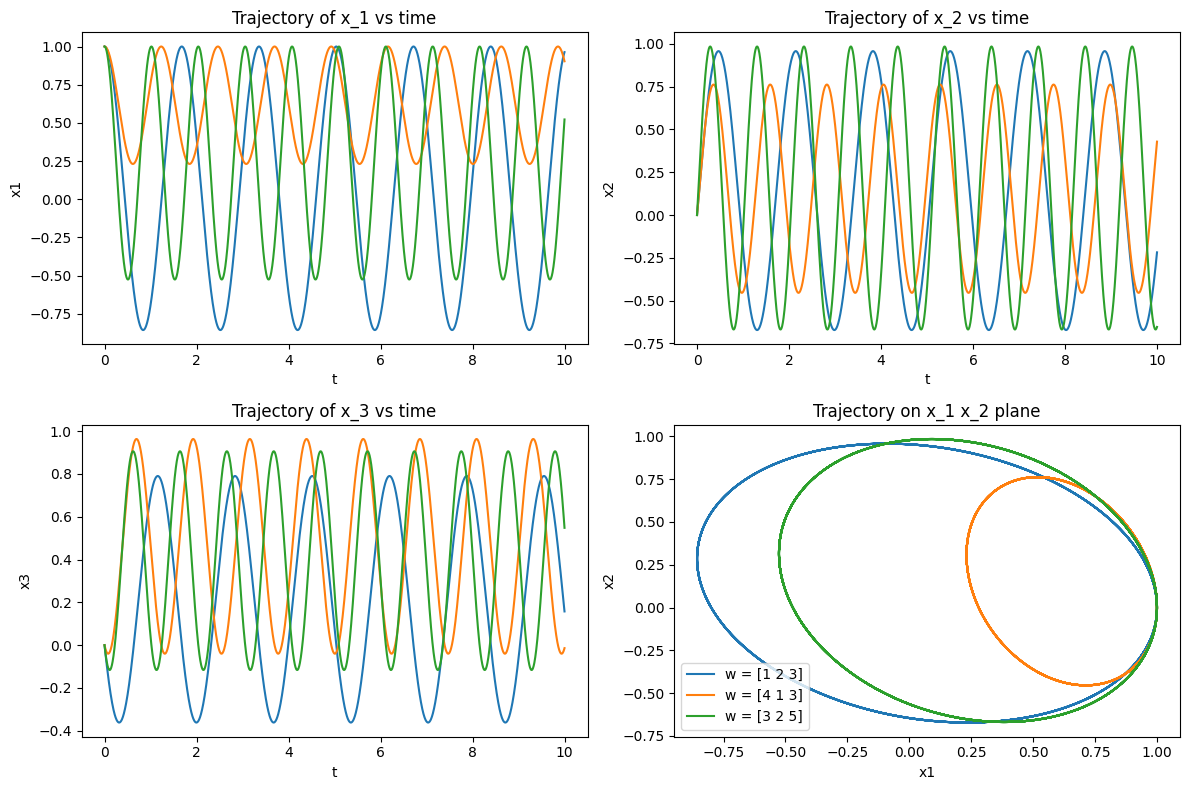

In [12]:
# Code for Problem 5c

# Define matrix A with a function that returns a dot product.
def system(x, t, w):
    A = np.array([[0, -w[2], w[1]],
                     [w[2], 0, -w[0]],
                     [-w[1], w[0], 0]])
    return np.dot(A, x)

# Random values for w_i
wVals = [
    np.array([1, 2, 3]),
    np.array([4, 1, 3]),
    np.array([3, 2, 5])
]

x = np.array([1, 0, 0]) # Initial condition
t = np.linspace(0, 10, 2000) # Values for the time variable

# Plot trajectories
plt.figure(figsize=(12, 8))

for w in wVals:

    x_t = odeint(system, x, t, args=(w,) )# Solve the system of ODEs

    # Plot Characteristics for each plot
    plt.subplot(2, 2, 1)
    plt.plot(t, x_t[:, 0], label=f'w = {w}')
    plt.title('Trajectory of x_1 vs time')
    plt.xlabel('t')
    plt.ylabel('x1')

    plt.subplot(2, 2, 2)
    plt.plot(t, x_t[:, 1])
    plt.xlabel('t')
    plt.title('Trajectory of x_2 vs time')
    plt.ylabel('x2')

    plt.subplot(2, 2, 3)
    plt.plot(t, x_t[:, 2])
    plt.title('Trajectory of x_3 vs time')
    plt.xlabel('t')
    plt.ylabel('x3')

    plt.subplot(2, 2, 4)
    plt.plot(x_t[:, 0], x_t[:, 1], label=f'w = {w}')
    plt.title('Trajectory on x_1 x_2 plane')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc="best")

plt.tight_layout()
plt.show()

### 6. Analysis of a Bistable Switch

A genetic bistable switch has the model

$$
\dot u = \frac{\alpha_1}{1 + v^2} - u \\
\dot v = \frac{\alpha_2}{1 + u^2} - v
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two proteins $u$ and $v$. The behavior of this system is that when one protein is high, the other should be low.

a) Show that when $\alpha_1 = \alpha_2 = \frac{17}{4}$, there are two isolated equilibra corresponding to having one protein be high and the other low. Show that these equilibria are unstable.

**Note**: You might start this problem by plotting the vector field for this system and finding the equilibria graphically.

b) Find values of $\alpha_1$ and $\alpha_2$ for which there is only equilibrium (assuming positive values for $u$ and $v$). Is this equilibrium stable?

## Answers to Problem 6

# a)
$\alpha_1 = \alpha_2 = \frac{17}{4}= \alpha$. When $\dot x = \dot v = 0$ :

$$
\alpha-u(1+v^2)=0 \\
\alpha-v(1+u^2)=0 \\
$$

Thus, equilibria points for $(u,v)$ are $(\frac{\alpha}{2},1)$ and $(1,\frac{\alpha}{2})$ respectfully. \\

Jacobian:
\begin{align}
J & = \begin{pmatrix}
\frac{\partial \dot u}{\partial u} &
\frac{\partial \dot u}{\partial v} \\
\frac{\partial \dot v}{\partial u} &
\frac{\partial \dot v}{\partial v} \\
\end{pmatrix} \\
\end{align}

\begin{align}
 = \begin{pmatrix}
-1 &
\frac{-8.5v}{(1+v^2)^2} \\
\frac{-8.5u}{(1+u^2)^2} &
-1 \\
\end{pmatrix} \\
\end{align}

Jacobian at $(\frac{\alpha}{2},1)$ is:

\begin{align}
J & = \begin{pmatrix}
-1 & \frac{-8.5}{4} \\
\frac{-4.25 \alpha}{(1+(\frac{\alpha}{2})^2)^2}  & -1 \\
\end{pmatrix}
\end{align}

Jacobian at $(1,\frac{\alpha}{2})$ is:

\begin{align}
J & = \begin{pmatrix}
-1 & \frac{-4.25 \alpha}{(1+(\frac{\alpha}{2})^2)^2} \\
\frac{-8.5}{4}   & -1 \\
\end{pmatrix}
\end{align}

Eigenvalues by: $det|J- \lambda I|$ for both Jacobians are: $\lambda= -1.325, -0.675$. Thus the system is actually stable (Confirmed with the professor, this should be stable).

In [13]:
# Code for problem 6a

# Eigenvalues for the Matrix
A = sm.Matrix([
    [-1,-8.5/4],
    [-4.25*(17/4)/((1+289/16)**2),-1]
])

A.eigenvals()

{-1.32500387610613: 1, -0.674996123893869: 1}

# b)

The Jacobian is:
\begin{align}
 J = \begin{pmatrix}
-1 & \frac{-2v \alpha_1}{(1+v^2)^2} \\
\frac{-2u \alpha_2 }{(1+u^2)^2} &-1 \\
\end{pmatrix} \\
\end{align}

Eigenvalues per $det|J- \lambda I|$ :

$$
\lambda^2 +2 \lambda +1 + \frac{4uv \alpha_1 \alpha_2}{(1+v^2)^2(1+u^2)^2}=0 \\
$$

\\
Regarding equilibria, there will always be equilibrium for any $\alpha_i$ value. For example, if $v=0$ in $\dot x$, $u= \alpha_1$ when solving for equilibria.  

$$
\alpha_1-u(1+0^2)=0
$$

Since $u,v>0$, if $\alpha_i >0$, the eigenvalues must be negative, meaning the system will be stable for any positive $\alpha_i$ values, or if both are negative.

\\
However, if one $\alpha_i$ is negative, there does exist a possibility where the eigenvalues may be positive to solve for $0$, which would lead to an unstable system. Although, it may not be biologically possible for these rates to be negative.

### 7. Simulation

Using simulation and visualization, explain the behavior of the system

\begin{eqnarray}
\dot x & = & -y - z \\
\dot y & = & x + a y \\
\dot z & = & b + z(x-c)
\end{eqnarray}

where $a=0.2$, $b=0.2$ and $c=5.7$.

## Answer to Problem 7

As will be shown in the code below, $\dot x$ and $\dot y$ oscillate while $\dot z$ stagnates. This creates a spiral trajectory.

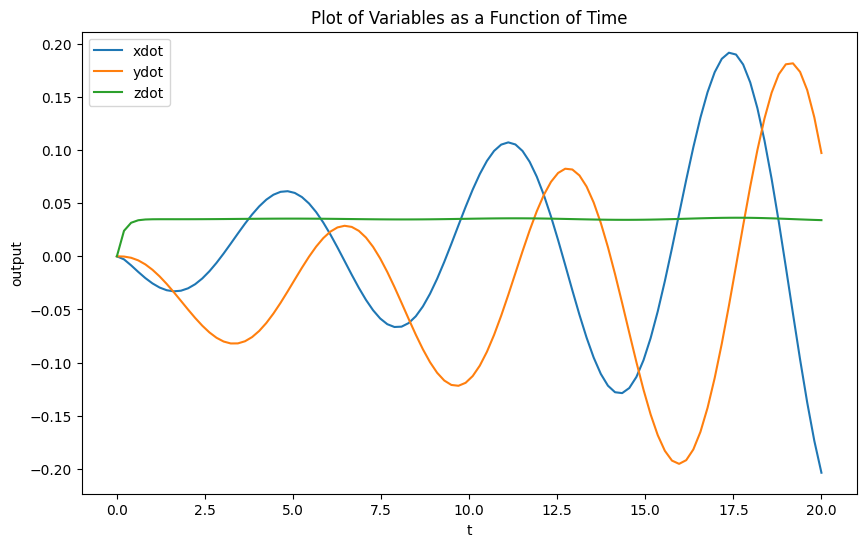

In [14]:
# Simulation of Problem 7

# Define the system
def system(X, t):
    x, y, z = X
    xdot = -y-z
    ydot = x +0.2*y
    zdot = 0.2 + z*(x-5.7)
    return [xdot, ydot, zdot]

x = [0, 0, 0] # Initial condition
t = np.linspace(0, 20, 100)  # Plot range

# Solve the system of ODEs
system = odeint(system, x, t)

# Extract the output from the system. Because the function returns an array with 3 columns, it must be transposed to 3 rows to plot easily.
# Match each row to its respective values
xValues, yValues, zValues = system.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, xValues, label='xdot')
plt.plot(t, yValues, label='ydot')
plt.plot(t, zValues, label='zdot')
plt.xlabel('t')
plt.ylabel('output')
plt.legend()
plt.title('Plot of Variables as a Function of Time')
plt.show()

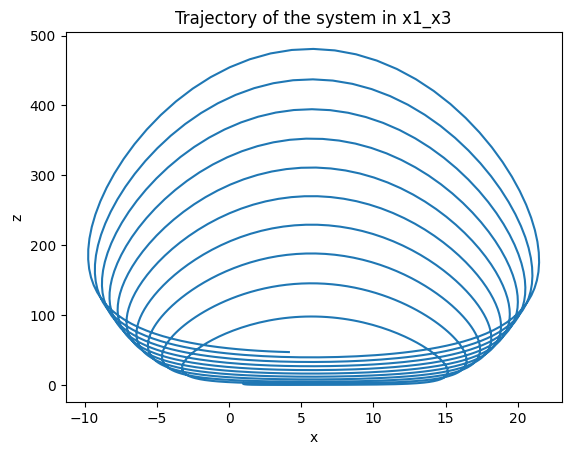

In [15]:
# Plotting Trajectory for Problem 7

# Define the system
def system(X,t):
    x,y,z = X
    return [
        y-z,
        x+0.2*y,
        0.2+z*(x-5.7)
    ]
t = np.linspace(0., 10, 2000)
X = odeint(system,[1,2,3],t);

plt.plot(X[:,0],X[:,2]); # Plot on x and z
plt.xlabel("x")
plt.ylabel("z");
plt.title('Trajectory of the system in x1_x3')
plt.show()

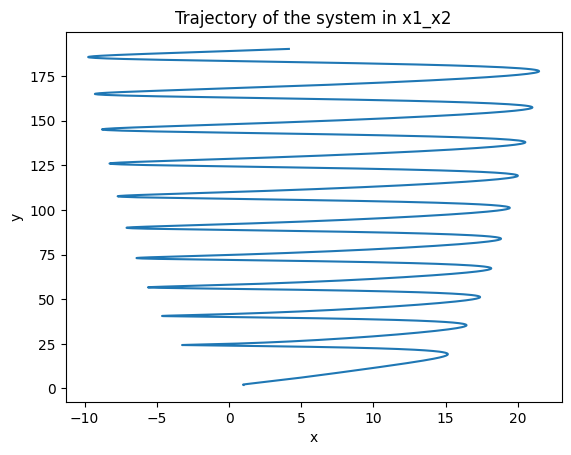

In [16]:
plt.plot(X[:,0],X[:,1]); # Plot on x and y
plt.xlabel("x")
plt.ylabel("y");
plt.title('Trajectory of the system in x1_x2')
plt.show()